In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset

df_play = pd.read_csv('playstore-analysis (2) (1).csv')

In [4]:
# Checking the dataset

df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the shape of the dataset.

df_play.shape

(10841, 13)

    There are 10841 records and 13 columns in the dataset including the target variable.

In [5]:
# Cheking the basic information of the variables of the dataset.

df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
# Checking the missing values

df_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

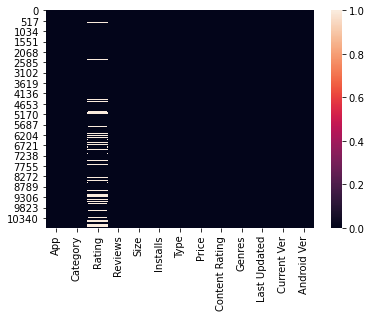

In [7]:
# Visualizing the missing vauesusing heatmap

sns.heatmap(df_play.isnull())
plt.show()

    The target variable i.e. 'Rating' have have a lot of missing vaulues.
    Very few null values are also present in 'Type ', 'Content Rating', 'Android Ver' and 'Current Ver'.

### 1. Data clean up – Missing value treatment

#### a. Drop records where rating is missing since rating is our target/study variable.

In [8]:
# Droping the records

df_play.dropna(subset = ['Rating'], axis = 0, inplace = True)

In [9]:
# Checking the variable's null values after removing them.

df_play['Rating'].isnull().sum()

0

    The missing values for 'Rating' is treated.

In [10]:
# Checking the shape of dataset after the above operation.

df_play.shape

(9367, 13)

    Now, the dataset have 9367 rows or records and 13 columns.

##### b. Check the null values for the Android Ver column.

In [11]:
# Chceking the count of missing values in android ver column.

print(f"Count of missing values in Android Ver : {df_play['Android Ver'].isnull().sum()}")

Count of missing values in Android Ver : 3


##### i. Are all 3 records having the same problem?

In [12]:
# Checking the rows where android ver column have null values.

df_play.loc[df_play['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


    Yes, all the 3 records have NaN values in 'Android Ver'.

##### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [13]:
# Dropping the 3rd null record i.e. index no. 10472

df_play.drop([10472], axis = 0, inplace = True)

In [14]:
# Now, again checking the count of total null values in column 'Android Ver' after droping 1 record.

print(f"Count of missing values in Android Ver : {df_play['Android Ver'].isnull().sum()}")

Count of missing values in Android Ver : 2


    Only two records are left having null values.

##### iii. Replace remaining missing values with the mode

In [5]:
a = [i for i in df_play['Android Ver']]
a

    

['4.0.3 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '4.2 and up',
 '4.4 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.2 and up',
 '3.0 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.0 and up',
 '4.1 and up',
 '4.4 and up',
 '2.3 and up',
 '4.2 and up',
 '4.1 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 '3.0 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '2.3 and up',
 '2.3 and up',
 '4.0.3 and up',
 '2.3 and up',
 '4.0 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.4 and up',
 '2.3.3 and up',
 '4.0.3 and up',
 '4.0 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 'Varies with device',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 'Varies with device',
 '4.1 and up',
 '4.1 and up',
 '4.0 and up',
 '4.4 and up',
 '4.1 and up',
 '2.2 and up',
 '4.4 and up',
 '4.0.3 and up',
 '4.2 and up',
 '4.1 and up',
 '4.0

In [15]:
# Checking the mode of the column 'Android Ver'.

df_play['Android Ver'].mode()

0    4.1 and up
dtype: object

In [16]:
# Replacing the missing values with the mode.

df_play['Android Ver'] = df_play['Android Ver'].fillna(df_play['Android Ver'].mode()[0])

In [17]:
# Again checking the missing values after treating the same.

print(f"Count of missing values in Android Ver : {df_play['Android Ver'].isnull().sum()}")

Count of missing values in Android Ver : 0


##### c. Current ver – replace with most common value

In [18]:
# Checking the missing value in column 'Current ver'

df_play['Current Ver'].isnull().sum()

4

    The count of missing values is 4 in column 'Current Ver'.

In [19]:
# Replacing the Nan values with the most common value i.e. mode.

df_play['Current Ver'] = df_play['Current Ver'].fillna(df_play['Current Ver'].mode()[0])

In [20]:
# Again checking the missing values after treating the same.

print(f"Count of missing values in Android Ver : {df_play['Current Ver'].isnull().sum()}")

Count of missing values in Android Ver : 0


    The missing values have been treated.

### 2. Data clean up – correcting the data types

##### a. Which all variables need to be brought to numeric types?

    All the varaibles except 'Rating and 'Size' which is of float64 data type are of object datatype.

In [21]:
# Now, only checking the columns having object datatype.

obj_col = df_play.select_dtypes(include = object)
obj_col.head()

,App,Category,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# Checking the total columns having object datatype.

obj_col.shape[1]

11

    There are total 11 variables having object datatype.

*'Reviews', 'Installs' and 'Price' should be converted into numeric form.*

##### b. Price variable – remove $ sign and convert to float

In [23]:
# Removing the $ sign.

df_play['Price'] = df_play['Price'].replace('[\$,]', '', regex = True)

In [24]:
# Converting the variable data type from object to float

df_play['Price'] = df_play['Price'].astype('float')

In [25]:
# Checking the datatype after converting the same.

df_play['Price'].dtype

dtype('float64')

    The 'Price' variable has been cleaned and converted into numeric as well.

##### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [26]:
# Removing ‘,’ and ‘+’ sign.

df_play['Installs'] = df_play['Installs'].str.replace(',','').str.replace('+','')

In [27]:
# Converting the variable data type from object to integer

df_play['Installs'] = df_play['Installs'].astype('int')

In [28]:
# Checking the datatype after converting the same.

df_play['Installs'].dtype

dtype('int32')

##### d. Convert all other identified columns to numeric

In [29]:
# Converting the data type of 'Reviews' into integer

df_play['Reviews'] = df_play['Reviews'].astype('int')

In [30]:
# Checking the datatype after converting the same.

df_play['Reviews'].dtype

dtype('int32')

In [31]:
# CHecking the shape of the dataset after data cleaning

df_play.shape

(9366, 13)

In [32]:
# Additional conversion

# data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

### 3. Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
*i. Are there any such records? Drop if so*

In [33]:
# Checking whether any record have ratingsless then 1 and more than 5.

df_play[((df_play['Rating'] < 1) & (df_play['Rating'] > 5))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


    There are no records having ratings less than 1 and more than 5.

##### b. Reviews should not be more than installs as only those who installed can review the app.
*i. Are there any such records? Drop if so.*

In [34]:
# Checking whether there is any record having reviews more than installs of the application.

df_play[(df_play['Reviews'] > df_play['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


    So, there are 7 records in total having reviews more than installation of the application.

In [35]:
# dropping the above records found

df_play.drop(df_play[(df_play['Reviews'] > df_play['Installs'])].index, inplace = True)

In [36]:
# Checking whether the records are dropped or not.

(df_play['Reviews'] > df_play['Installs']).sum()

0

In [37]:
# Now, again checking the shape of the dataset after the above operation

df_play.shape

(9359, 13)

### 4. Identify and handle outliers – 
##### a. Price column
*i. Make suitable plot to identify outliers in price*

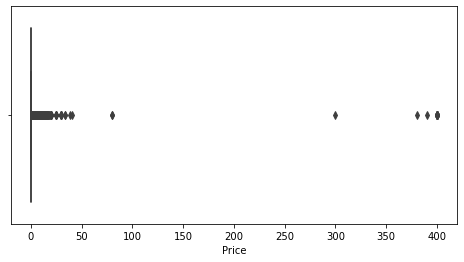

In [38]:
# Visualizing outliers in 'Price' using boxplot.

plt.figure(figsize=(8,4))

sns.boxplot(df_play['Price'], data = df_play)
plt.show()

*ii. Do you expect apps on the play store to cost $200? Check out these cases*

In [39]:
# Checking the records where price of apps on play store is $200.

(df_play['Price'] == 200).sum()

0

    There are no records where the cost of apps on play store is equal to $200.

In [40]:
# Checking the records where price of apps on play store is more than $200.

df_play[df_play['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
# Checking the total count of records where price of apps on play store is more than $200.
 
print(f'There are total {(df_play.Price > 200).sum()} records having cost of app more than $200 on play store.')

There are total 15 records having cost of app more than $200 on play store.


    Yes, we can say that there are app on play store having cost of more than $200.

*iv. Limit data to records with price < $30*

In [42]:
# Limiting the records by dropping the those records having app price more than $30

df_play.drop(df_play[df_play['Price'] > 30].index, inplace = True)

In [43]:
# Checking the shape of the dataset afterthe above operation

df_play.shape

(9338, 13)

*iii. After dropping the useless records, make the suitable plot again to identify outliers*

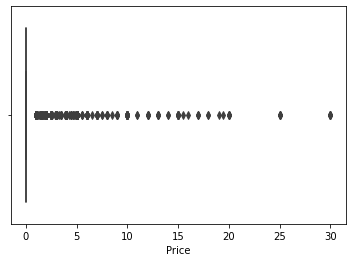

In [44]:
# Visuaizing the outliers using the boxplot after removing the unneceesray records.

sns.boxplot(df_play['Price'], data = df_play)
plt.show()

##### b. Reviews column
*i. Make suitable plot*

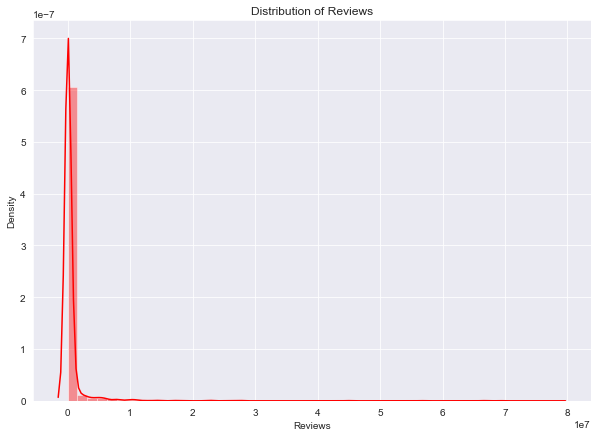

In [45]:
# Setting the figure size
plt.figure(figsize=(10,7))

# Setting the figure style
sns.set_style('darkgrid')

# Adding title to the plot
plt.title("Distribution of Reviews")

# Visualizing the distribution of reviews.
sns.distplot(df_play['Reviews'], color = 'red')
plt.show()

*ii. Limit data to apps with < 1 Million reviews*

In [46]:
# Chceking the records where apps having less then 1 million reviews

print(f'There are {(df_play.Reviews > 1000000).sum()} records where Apps are having less than 1 million reviews ')

There are 704 records where Apps are having less than 1 million reviews 


In [47]:
# Droping the above found records inorder to limit the data with records having more than 1 million views on apps

df_play.drop(df_play[df_play['Reviews'] > 1000000].index, inplace = True)

In [48]:
# CHceking the records again

print(f'Total records in the dataset : {df_play.shape[0]}')

Total records in the dataset : 8634


##### c. Installs
*i. What is the 95th percentile of the installs?*

In [49]:
install_per = np.percentile(df_play.Installs, 95)

print(f'95th percentile of installs : {install_per}')

95th percentile of installs : 10000000.0


*ii. Drop records having a value more than the 95th percentile*

In [50]:
# Checking the sum of records having a value more than the 95th percentile

(df_play.Installs > install_per).sum()

199

In [51]:
# Droping the 199 records as they have a value more than 95th percentile.

df_play.drop(df_play[df_play['Installs'] > install_per].index, inplace = True)

In [52]:
# Chceking the shape of the dataset after the above operation

df_play.shape

(8435, 13)

## Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


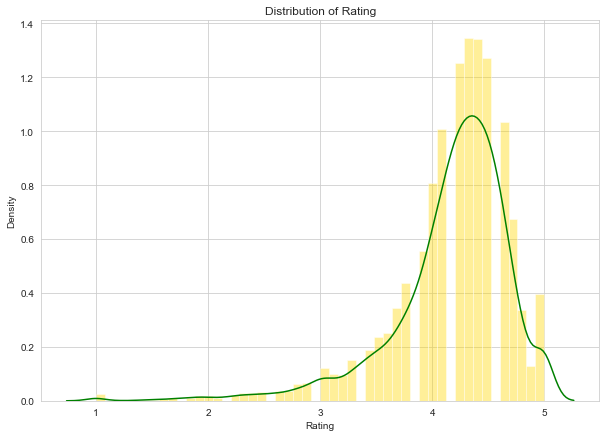

In [53]:
# Visualizing the distribution of 'Ratings' using distplot.

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

plt.title("Distribution of Rating")
sns.distplot(df_play['Rating'], color = 'gold', kde_kws = {"color" : "green"})
plt.show()

##### a. How do you explain this?

    The distribution of 'Rating' is negatively skewed, as the distribution with the tail on its left side.
    Thus, the value of skewness for a negatively skewed distribution is less than zero and the distribution of Rating is
    more Skewed towards lower values.
    Where, mean < median < mode.

In [54]:
# Checking the value of skewness of 'Rating'

rat_skew = df_play['Rating'].skew()
rat_skew

-1.7434270330647985

##### b. What is the implication of this on your analysis?

    Too much of Skewness can mislead the data by changing the median by inflating or deflating it.
    As, this distribution is skewed for lower values, it indicates that the apps having higher ratings is able to hide
    the low rating apps of the majority by inflating the average rating. 
    Hence, also indicating the outliers as the tail is negatively skewed.

### 6. What are the top Content Rating values?

In [55]:
# Checking the categories of 'Content Rating'

df_play['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

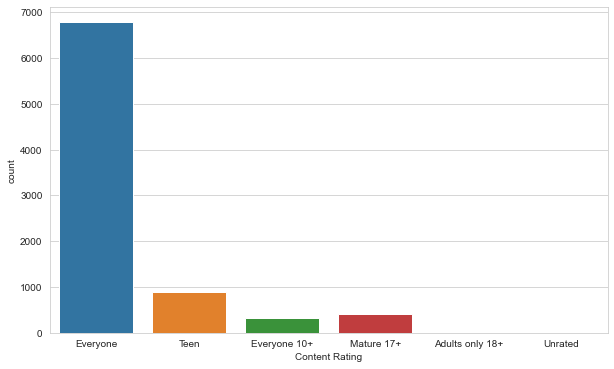

In [56]:
# Visualising the categories of 'Content Rating'

plt.figure(figsize=(10,6))

sns.countplot(df_play['Content Rating'])
plt.show()

    Content rating value - Everyone has the approx. 80% of the values as compared to other ratings.

##### a. Are there any values with very few records?

    Yes, the are values:
            - Adults only 18+
            - Unrated
    with almost no values, thus, having a very few records.

##### b. If yes, drop those as they won’t help in the analysis

In [57]:
# Dropping the values having a few records.

df_play.drop(df_play[df_play['Content Rating'] == 'Adults only 18+'].index, inplace = True)
df_play.drop(df_play[df_play['Content Rating'] == 'Unrated'].index, inplace = True)

In [58]:
# CHceking the unique value after dropping the 2 sub -categories.

np.unique(df_play['Content Rating'])

array(['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen'], dtype=object)

### 7. Effect of size on rating
##### a. Make a joinplot to understand the effect of size on rating

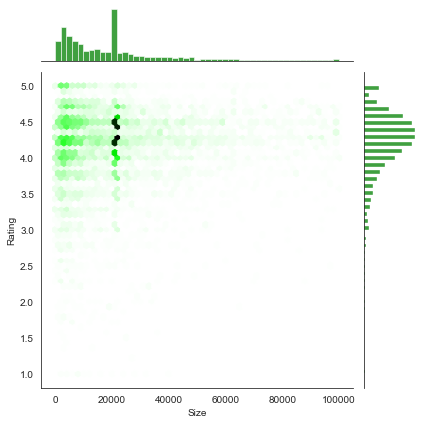

In [59]:
# VIsuaising the jointplot to see the relationship between the size of the appa nd it's ratings on play store.

sns.set_style('white')
sns.jointplot(x = 'Size', y = 'Rating', data = df_play, kind = 'hex', color = 'g')
plt.show()

##### b. Do you see any patterns?

    The above plot shows the bivariate analysis of the variables. Thus, it represents the correlation, i.e. relationship
    of the variables and also describes the strength of their relationship.

##### c. How do you explain the pattern?

    The pattern observed is, darker colors indicating that the data points are concentrated in that region, i.e.
    data points between range 3.7 - 4.5, while white bins indicate that there is no data or less conecnetartion of data 
    points. Thus we can conclude that their is positive correlation between Size and Rating.

### 8. Effect of price on rating
##### a. Make a jointplot (with regression line)

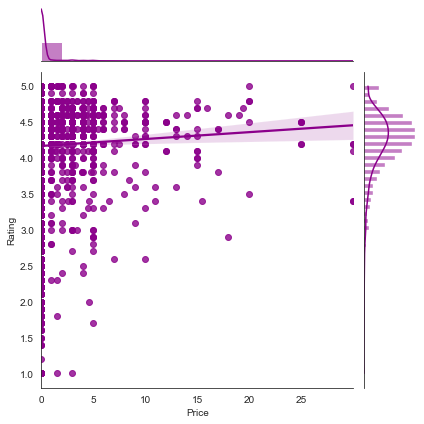

In [60]:
# VIsualising the effect of price of the app on rating.

sns.jointplot(x = 'Price', y = 'Rating', data = df_play, kind = 'reg', color = 'darkmagenta')
plt.show()

##### b. What pattern do you see?

    Here, the pattern seems to be as the price increases the rating is constat which is 4.

##### c. How do you explain the pattern?

    As the price incraese of the app, the regression line shows the positive line but not totally, the relation is almost
    or approxx. to 4 as rating when the price increases. Thus, There is not much effect of price on ratings as the 
    price increases ratings remain constant between 4.0 to 4.5

##### d. Replot the data, this time with only records with price > 0

In [61]:
# Getting the data where price is greater than 0

df_price = df_play[df_play['Price'] > 0]

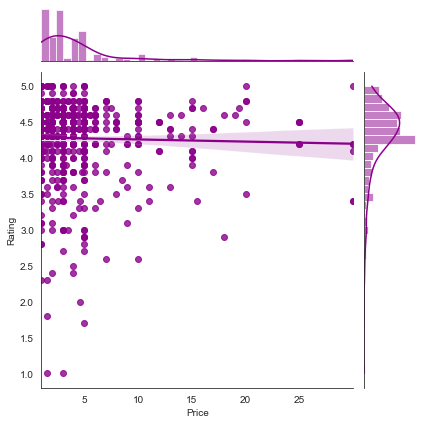

In [62]:
# Visualizing the plot.

sns.jointplot(x = 'Price', y = 'Rating', data = df_price, kind = 'reg', color = 'darkmagenta')
plt.show()

##### e. Does the pattern change?

    Yes, the pattern changes slightly.
    Although, there is not much change in the pattern when we look for the apps whose price is greater than zero.
    As we can see there is a slight fall in the ratings when apps are greater than zero.

##### f. What is your overall inference on the effect of price on the rating

    Most of the apps whose price is between 0 to 5 are the one which are having most of the ratings or diversed ratngs
    and the apps which are free have highest number of ratings. As the Price increase there is a slight down fall because
    most of the apps are not affordable at the listed price. There is a not much effect of price on rating.

### 9. Look at all the numeric interactions together –
##### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

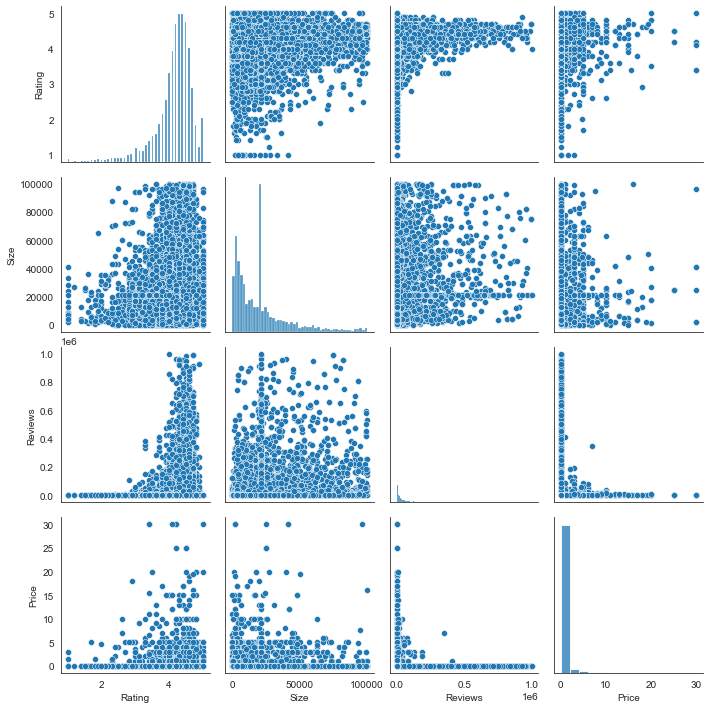

In [63]:
# VIsualising the numeric data together in a pairplot.

sns.pairplot(df_play, vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

### 10. Rating vs. content rating
##### a. Make a bar plot displaying the rating for each content rating

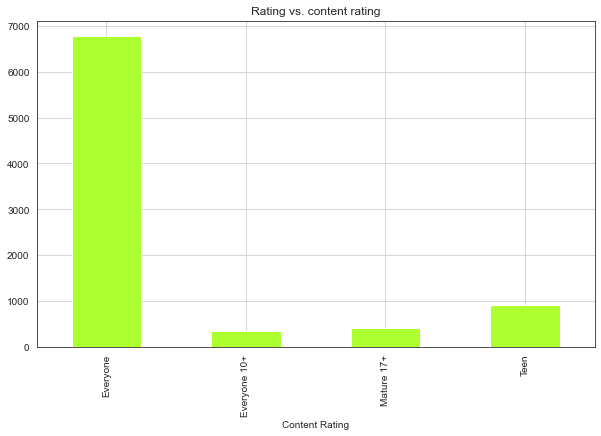

In [64]:
# Visualising the rating for each content rating using bar plot

plt.figure(figsize=(10,6))
plt.title('Rating vs. content rating')
sns.set_style('darkgrid')

df_play.groupby(['Content Rating'])['Rating'].count().plot.bar(color = "greenyellow")
plt.show()

##### b. Which metric would you use? Mean? Median? Some other quantile?

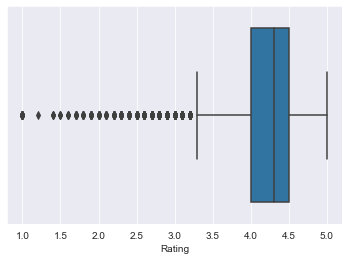

In [65]:
# Boxplot

sns.boxplot(df_play['Rating'], data = df_play)
plt.show()

    As, there are outliers in 'Ratings', then the right metric would be median in this case.

##### c. Choose the right metric and plot

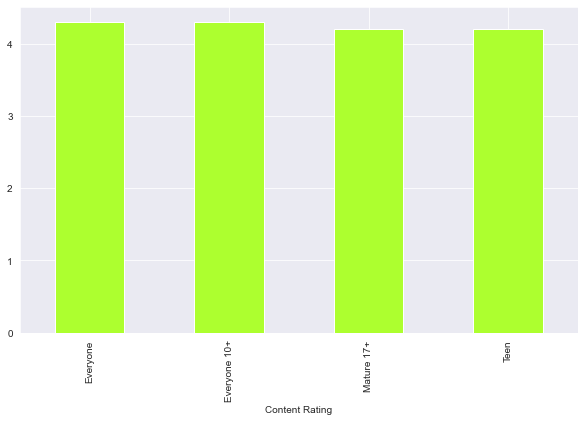

In [66]:
# Visualising the bar plot

plt.figure(figsize=(10,6))

df_play.groupby(['Content Rating'])['Rating'].median().plot.bar(color = "greenyellow")
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time
##### a. Create 5 buckets (20% records in each) based on Size

In [67]:
# Creating bin
bins = [0, 20000, 40000, 60000, 80000, 100000]

# CReating bucket size
df_play['bucket_size'] = pd.cut(df_play['Size'], bins, 
                                labels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k'])

# Creating a table to comapre the values of 'Conten Rating', 'Size' and 'Rating'
table1 = pd.pivot_table(df_play, 
                        values = 'Rating',
                        index = 'bucket_size',
                        columns = 'Content Rating')

table1

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
bucket_size,,,,
0 - 20k,4.145730,4.247561,4.010582,4.182240
20k - 40k,4.200195,4.169811,4.156291,4.170432
40k - 60k,4.167083,4.263636,4.190476,4.237383
60k - 80k,4.245408,4.280769,4.200000,4.274194
80k - 100k,4.260127,4.304762,4.252632,4.270313


##### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [68]:
# Creating a table to comapre the values of 'Conten Rating', 'Size' and 'Rating' having value og 20th quantile

table2 = pd.pivot_table(df_play, 
                        values = 'Rating',
                        index = 'bucket_size',
                        columns = 'Content Rating',
                        aggfunc = lambda x : np.quantile(x, 0.2))

table2

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
bucket_size,,,,
0 - 20k,3.80,4.02,3.5,3.9
20k - 40k,4.00,4.00,4.0,3.9
40k - 60k,3.90,4.06,4.1,4.0
60k - 80k,4.00,4.00,4.0,4.0
80k - 100k,4.04,4.10,4.0,4.0


##### c. Make a heatmap of this
*i. Annotated*

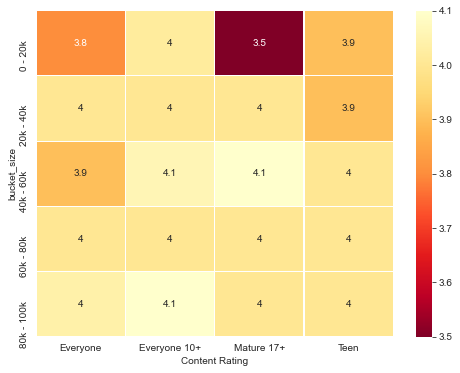

In [69]:
# VIsualizing the table using heatmap which is annoted 

plt.figure(figsize = (8,6))
sns.heatmap(table2, annot = True, linewidths = .2, cmap = 'YlOrRd_r')
plt.show()

*ii. Greens color map*

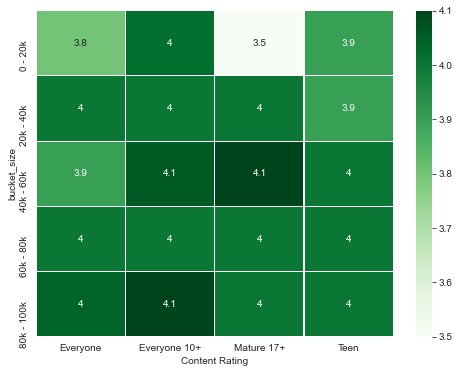

In [70]:
plt.figure(figsize = (8,6))
sns.heatmap(table2, annot = True, linewidths = .2, cmap = 'Greens')
plt.show()

##### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

    Based on analysis, the apps with size 20k - 100k have got the highest rating in all cateegories. So, its not true 
    that lighter apps are preferred in all categories. Thus, in general we can conclude that heavier apps are preferred in
    all categories.